In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
titanic = sns.load_dataset('titanic')

df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()
print(df.shape)

(712, 8)


In [23]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [24]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

In [25]:
df['age_fare_interaction'] = df['age'] * df['fare']

In [26]:
df['is_child'] = (df['age'] < 12).astype(int)

In [27]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
print("\nSample with new features:")
print(df.head())


Sample with new features:
   survived  pclass   age  sibsp  parch     fare  family_size  \
0         0       3  22.0      1      0   7.2500            2   
1         1       1  38.0      1      0  71.2833            2   
2         1       3  26.0      0      0   7.9250            1   
3         1       1  35.0      1      0  53.1000            2   
4         0       3  35.0      0      0   8.0500            1   

   age_fare_interaction  is_child  sex_male  embarked_Q  embarked_S  
0              159.5000         0      True       False        True  
1             2708.7654         0     False       False       False  
2              206.0500         0     False       False        True  
3             1858.5000         0     False       False        True  
4              281.7500         0      True       False        True  


In [28]:
from sklearn.datasets import load_iris

In [29]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
print(X[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("\nExplained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.72962445 0.22850762]


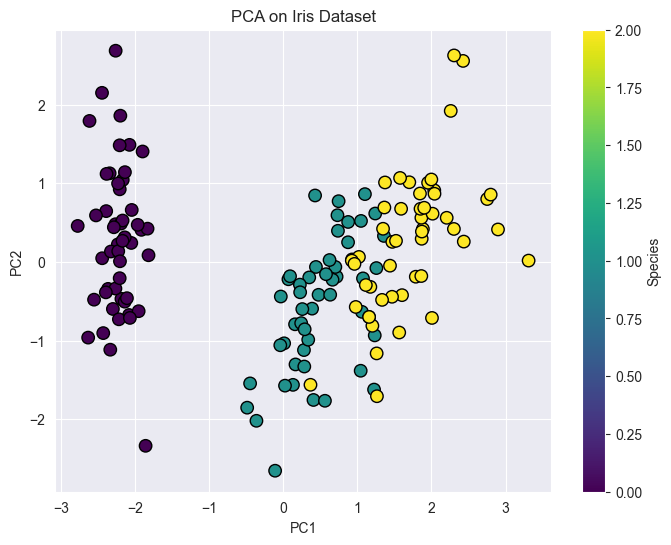

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', edgecolor='k', s=80)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Dataset")
plt.colorbar(label="Species")
plt.show()

In [34]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1) Load data
df = sns.load_dataset("titanic").copy()

# We'll use only numeric columns to keep it simple
num_cols = ["age", "fare", "pclass", "sibsp", "parch"]

df = df.dropna(subset=["survived"]).copy()
y = df["survived"].astype(int)
#  Simple imputation for numerics (median)
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

X = df[num_cols].astype(float)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [35]:
# PCA to 2 components
pca = PCA(n_components=2, svd_solver="full")
X_pca = pca.fit_transform(X_std)
evr = pca.explained_variance_ratio_
print("Explained variance ratio (PC1, PC2):", evr, " | cumulative:", evr.sum())

Explained variance ratio (PC1, PC2): [0.33960812 0.32520788]  | cumulative: 0.6648159969553279


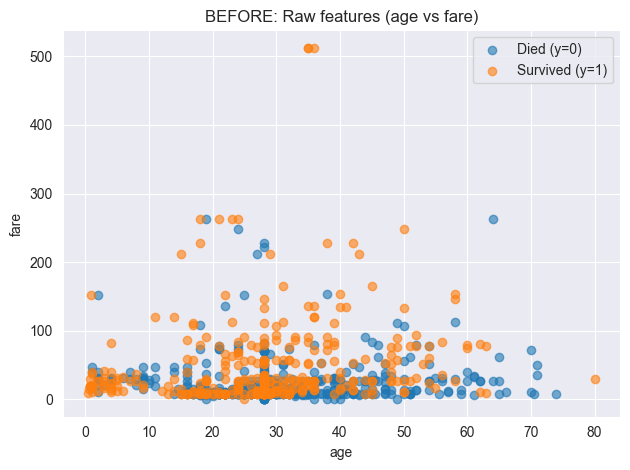

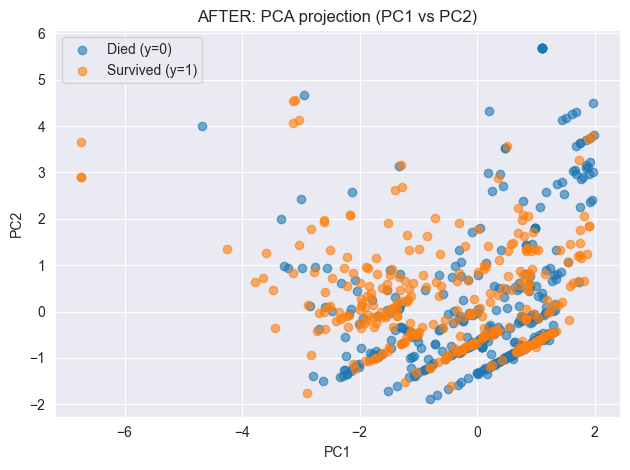

In [36]:
# 5) BEFORE: Raw-space visualization (pick two original features)
plt.figure()
mask0 = (y == 0).values
mask1 = (y == 1).values
plt.scatter(X.loc[mask0, "age"], X.loc[mask0, "fare"], alpha=0.6, label="Died (y=0)")
plt.scatter(X.loc[mask1, "age"], X.loc[mask1, "fare"], alpha=0.6, label="Survived (y=1)")
plt.xlabel("age"); plt.ylabel("fare"); plt.title("BEFORE: Raw features (age vs fare)")
plt.legend()
plt.tight_layout()
plt.show()

# 6) AFTER: PCA-space visualization (PC1 vs PC2)
plt.figure()
plt.scatter(X_pca[mask0, 0], X_pca[mask0, 1], alpha=0.6, label="Died (y=0)")
plt.scatter(X_pca[mask1, 0], X_pca[mask1, 1], alpha=0.6, label="Survived (y=1)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("AFTER: PCA projection (PC1 vs PC2)")
plt.legend()
plt.tight_layout()
plt.show()

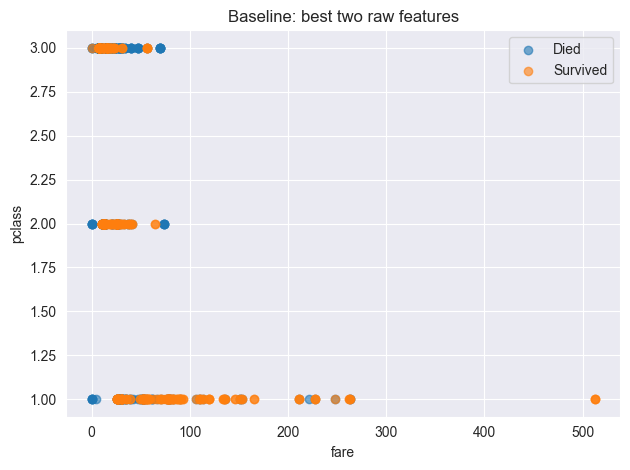

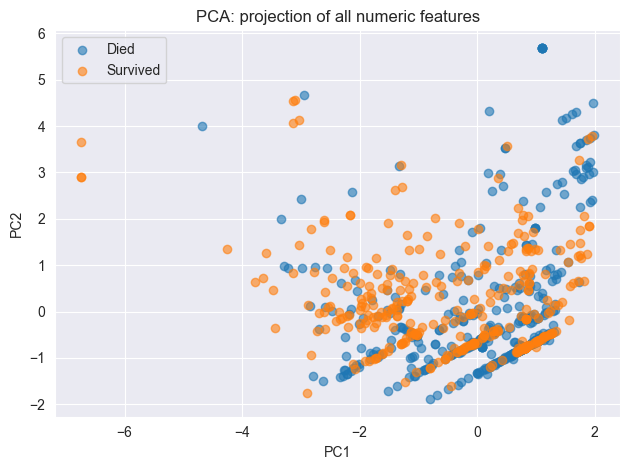

In [37]:
import seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load & prep
df = sns.load_dataset("titanic").dropna(subset=["survived"]).copy()
y = df["survived"].astype(int)
num = ["age","fare","pclass","sibsp","parch"]
for c in num: df[c] = df[c].fillna(df[c].median())
X = df[num].astype(float)

# Pick best two raw features (univariate) using ANOVA
fvals, _ = f_classif(X, y)
best2 = np.argsort(fvals)[-2:]
f1, f2 = X.columns[best2]

# Plot baseline: best two raw features
plt.figure();
plt.scatter(X[f1][y==0], X[f2][y==0], alpha=0.6, label="Died")
plt.scatter(X[f1][y==1], X[f2][y==1], alpha=0.6, label="Survived")
plt.xlabel(f1); plt.ylabel(f2); plt.title("Baseline: best two raw features"); plt.legend(); plt.tight_layout(); plt.show()

# PCA on the same inputs
X_std = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2, svd_solver="full").fit_transform(X_std)

# Plot PCA: PC1 vs PC2
plt.figure();
plt.scatter(X_pca[y==0,0], X_pca[y==0,1], alpha=0.6, label="Died")
plt.scatter(X_pca[y==1,0], X_pca[y==1,1], alpha=0.6, label="Survived")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("PCA: projection of all numeric features"); plt.legend(); plt.tight_layout(); plt.show()


In [38]:
# Titanic: "All features" vs "PCA → 2 features" (no pipelines)
import seaborn as sns, pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 1) Load & target
df = sns.load_dataset("titanic").copy()
df = df.dropna(subset=["survived"])
y = df["survived"].astype(int)

# 2) Choose a modest feature set (numeric + a couple categoricals)
num_cols = ["age", "fare", "pclass", "sibsp", "parch"]
cat_cols = ["sex", "embarked"]   # simple, low-cardinality

# Impute: median for numeric, mode for categoricals
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode().iloc[0])

# One-hot encode categoricals (no label info leakage)
X = pd.get_dummies(df[num_cols + cat_cols], drop_first=True)

# Train/test split (stratified)
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Scale (fit on train, apply to test)
scaler = StandardScaler()
Xtr_sc = scaler.fit_transform(X_tr)
Xte_sc = scaler.transform(X_te)

# 4A) Baseline: Logistic Regression on ALL features
clf_all = LogisticRegression(max_iter=1000)
clf_all.fit(Xtr_sc, y_tr)
proba_all = clf_all.predict_proba(Xte_sc)[:, 1]
pred_all = (proba_all >= 0.5).astype(int)
print("ALL features — Acc:", accuracy_score(y_te, pred_all),
      "AUC:", roc_auc_score(y_te, proba_all), "| dims:", Xtr_sc.shape[1])

# 4B) PCA → 2 components, then Logistic Regression
pca = PCA(n_components=2, svd_solver="full")
Xtr_pca = pca.fit_transform(Xtr_sc)
Xte_pca = pca.transform(Xte_sc)
print("PCA EVR (PC1, PC2):", pca.explained_variance_ratio_,
      "| cumulative:", pca.explained_variance_ratio_.sum())

clf_pca2 = LogisticRegression(max_iter=1000)
clf_pca2.fit(Xtr_pca, y_tr)
proba_pca2 = clf_pca2.predict_proba(Xte_pca)[:, 1]
pred_pca2 = (proba_pca2 >= 0.5).astype(int)
print("PCA→2 comps — Acc:", accuracy_score(y_te, pred_pca2),
      "AUC:", roc_auc_score(y_te, proba_pca2), "| dims:", Xtr_pca.shape[1])

ALL features — Acc: 0.8044692737430168 AUC: 0.8433465085638999 | dims: 8
PCA EVR (PC1, PC2): [0.22969511 0.21202173] | cumulative: 0.441716845103451
PCA→2 comps — Acc: 0.659217877094972 AUC: 0.7318840579710144 | dims: 2
